# Observations
### Analysis of the Most Frequent Co-Occurrences:
- The analysis of the top 20 co-occurrences reveals interesting insights. For instance, there are pairs like ('generative', 'generative'), ('generative', 'learning'), ('ai', 'generative'), etc., which indicate strong relationships between these keywords.
- These co-occurrences highlight themes such as generative models, artificial intelligence (AI), learning, intelligence, networks, and models. It is evident that there is a focus on AI-driven generative models, learning algorithms, and intelligence across various domains.
- Additionally, co-occurrences like ('generative', 'network'), ('generative', 'model'), ('ai', 'model'), etc., suggest emerging trends in network-based generative models and AI-driven modeling.
- Furthermore, the co-occurrences involving multiple keywords, such as ('generative', 'ai'), ('ai', 'artificial'), etc., indicate interdisciplinary connections and potential collaborations between generative models and AI.

### Analysis of the Least Frequent Co-Occurrences:
- The co-occurrences at the bottom 20 have lower weights, indicating infrequent or weaker relationships between keywords.
- These co-occurrences involve keywords like 'hci' (Human-Computer Interaction) with less commonly used terms such as 'inspectability', 'modifiability', 'observability', and so on.
- These keywords may represent specific or specialized areas within the field of HCI.
- While the bottom co-occurrences may not indicate emerging trends like the top ones, they offer insights into particular subtopics or research areas within HCI.
- Although the bottom co-occurrences may not involve multiple keywords, they still represent potential intersections between HCI and other fields, such as education, colonialism, telecom, and more.

### Overall Observations:
- The top co-occurrences reveal dominant themes and emerging trends in AI and generative modeling.
- The bottom co-occurrences highlight specialized areas within HCI and potential interdisciplinary connections.
- By analyzing both the top and bottom co-occurrences, a comprehensive understanding of research focus areas and potential interdisciplinary connections within the field can be gained.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log

import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

from nltk import bigrams
from nltk import ngrams

import networkx as nx

# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Downloading the WordNet corpus
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Set working directory
%cd /content/drive/MyDrive/datasets/

/content/drive/MyDrive/datasets


In [6]:
# Reading first dataframe consisting of publications related to generative AI

df1 = pd.read_excel("Project_3_data_1.xls")
df1.head(2)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,C,"Bernstein, MS; Park, JS; Morris, MR; Amershi, ...",NaN,NaN,ACM,"Bernstein, Michael S.; Park, Joon Sung; Morris...",NaN,NaN,Architecting Novel Interactions With Generativ...,ADJUNCT PROCEEDINGS OF THE 36TH ANNUAL ACM SYM...,...,Conference Proceedings Citation Index - Scienc...,Computer Science,BW2TP,NaN,NaN,NaN,NaN,2024-04-05,WOS:001125107000106,0
1,J,"Sachan, S; Liu, X",NaN,NaN,NaN,"Sachan, Swati; Liu (Lisa), Xi",NaN,NaN,Blockchain-based auditing of legal decisions s...,ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...,...,Science Citation Index Expanded (SCI-EXPANDED),Automation & Control Systems; Computer Science...,DZ9O6,NaN,NaN,NaN,NaN,2024-04-05,WOS:001136038900001,0


In [7]:
# Reading second dataframe consisting of publications related to generative AI

df2 = pd.read_excel("Project_3_data_2.xls")
df2.head(2)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Chua, BN; Guo, WM; Wong, HT; Ow, DSW; Ho, PL; ...",NaN,NaN,NaN,"Chua, Bryan Nicholas; Guo, Wei Mei; Wong, Han ...",NaN,NaN,A sweeter future: Using protein language model...,FOOD CHEMISTRY,...,Science Citation Index Expanded (SCI-EXPANDED),Chemistry; Food Science & Technology; Nutritio...,L7MC5,37331142.0,NaN,NaN,NaN,2024-04-05,WOS:001025053900001,0
1,J,"Anker, AS; Butler, KT; Le, MD; Perring, TG; Th...",NaN,NaN,NaN,"Anker, Andy S.; Butler, Keith T.; Le, Manh Duc...",NaN,NaN,Using generative adversarial networks to match...,DIGITAL DISCOVERY,...,Emerging Sources Citation Index (ESCI),Chemistry; Computer Science,X9XY2,NaN,gold,NaN,NaN,2024-04-05,WOS:001101915800001,0


In [8]:
# Checking the number of publications in each dataframe

print(len(df1))
print(len(df2))

1000
674


In [9]:
# Concatenating both the dataframes to create a single dataframe of length 1674

publications_df = pd.concat([df1, df2], ignore_index=True)
publications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            1674 non-null   object 
 1   Authors                     1674 non-null   object 
 2   Book Authors                1 non-null      object 
 3   Book Editors                206 non-null    object 
 4   Book Group Authors          320 non-null    object 
 5   Author Full Names           1674 non-null   object 
 6   Book Author Full Names      1 non-null      object 
 7   Group Authors               3 non-null      object 
 8   Article Title               1674 non-null   object 
 9   Source Title                1674 non-null   object 
 10  Book Series Title           327 non-null    object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    1674 non-null   object 
 13  Document Type               1674 

In [10]:
# We will only be using the Author Keywords column from our publications_df for further text analysis

# extracting text from the Author Keywords column
original_text = ' '.join(publications_df['Author Keywords'].dropna())

# Initializing the WordNet lemmatizer to lemmatize the text
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token.lower())  # Lemmatize each token
        lemmatized_tokens.append(lemma)
    return ' '.join(lemmatized_tokens)


# Lemmatize the input text
lemmatized_text = lemmatize_text(original_text)

# Tokenizing the lemmatized_text into words
tokens = word_tokenize(lemmatized_text)

# Converting to lower case
tokens = [word.lower() for word in tokens]

# Removing punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]

# Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Calculating frequency distribution
freq_dist = FreqDist(tokens)

# Converting frequency distribution to a DataFrame
df = pd.DataFrame(freq_dist.most_common(), columns=['Word', 'Frequency'])

# Displaying the DataFrame
df.head(20)

,Word,Frequency
0,generative,758
1,ai,548
2,learning,481
3,intelligence,448
4,artificial,447
5,model,433
6,network,374
7,chatgpt,257
8,language,243
9,adversarial,240


In [11]:
# Looking at the top TF-IDF scores along with TF, IDF, and DF

In [12]:
# Tokenize each keyword phrase in the 'Author Keywords' column
keyword_documents = publications_df['Author Keywords'].fillna('').apply(lambda x: word_tokenize(x.lower()))

# Convert the tokenized keyword phrases into a list of documents
corpus = keyword_documents.tolist()

def preprocess(document):
    processed_tokens = []
    for token in document:
        token = token.lower()  # Convert token to lower case
        if token.isalpha() and token not in stop_words:  # Check if token is alphabetic and not a stopword
            processed_tokens.append(token)  # Add processed token to list
    return processed_tokens

# Preprocess documents
processed_corpus = [preprocess(doc) for doc in corpus]

# Calculate DF
def compute_df(corpus):
    df = {}
    for document in corpus:
        for word in set(document):
            df[word] = df.get(word, 0) + 1
    return df

df = compute_df(processed_corpus)

# Calculate TF
def compute_tf(document):
    tf = {}
    length = len(document)
    for word in document:
        tf[word] = tf.get(word, 0) + 1/length
    return tf

tf_corpus = [compute_tf(doc) for doc in processed_corpus]

# Calculate IDF
def compute_idf(df, corpus_size):
    idf = {}
    for word, val in df.items():
        idf[word] = log(corpus_size / val)
    return idf

idf = compute_idf(df, len(processed_corpus))

# Calculate TF-IDF
def compute_tfidf(tf_document, idf):
    tfidf = {}
    for word, val in tf_document.items():
        tfidf[word] = val * idf[word]
    return tfidf

tfidf_corpus = [compute_tfidf(doc, idf) for doc in tf_corpus]

# Preparing the final DataFrame for the first document as an example
words = list(tfidf_corpus[0].keys())
data = {
    "TF": [tf_corpus[0].get(word) for word in words],
    "IDF": [idf.get(word) for word in words],
    "DF": [df.get(word) for word in words],
    "TF-IDF": [tfidf_corpus[0].get(word) for word in words]
}
final_df = pd.DataFrame(data, index=words)
final_df.sort_values(by="TF-IDF", ascending=False, inplace=True)

final_df.head()  # Display the top TF-IDF scores along with TF, IDF, and DF


,TF,IDF,DF,TF-IDF
hci,0.2,6.729824,2,1.345965
interaction,0.2,3.926464,33,0.785293
ai,0.4,1.354546,432,0.541818
generative,0.2,0.871891,700,0.174378


In [16]:
# Using the tokens that we generated for frequency distribution
filtered_tokens = tokens

# Creating co-occurrence pairs with weights
co_occurrence_pairs = [(filtered_tokens[i],filtered_tokens[j]) for i in range(len(filtered_tokens)) for j in range(i + 1, len(filtered_tokens))]
weighted_co_occurrences = nltk.FreqDist(co_occurrence_pairs)

In [17]:
# Lets have a look at weighted co occurrences

weighted_co_occurrences

FreqDist({('generative', 'generative'): 286903, ('generative', 'learning'): 254746, ('ai', 'generative'): 251909, ('ai', 'learning'): 205692, ('generative', 'network'): 203570, ('generative', 'artificial'): 195312, ('generative', 'model'): 194910, ('generative', 'intelligence'): 194253, ('ai', 'artificial'): 166952, ('ai', 'intelligence'): 166249, ...})

In [18]:
# We will extract top co occurrences as we need this to build the graph
# creating a graph with all values will be too compute intensive

top_co_occurrences = dict(sorted(weighted_co_occurrences.items(), key=lambda item: item[1], reverse=True)[:20])
top_co_occurrences

{('generative', 'generative'): 286903,
 ('generative', 'learning'): 254746,
 ('ai', 'generative'): 251909,
 ('ai', 'learning'): 205692,
 ('generative', 'network'): 203570,
 ('generative', 'artificial'): 195312,
 ('generative', 'model'): 194910,
 ('generative', 'intelligence'): 194253,
 ('ai', 'artificial'): 166952,
 ('ai', 'intelligence'): 166249,
 ('ai', 'model'): 164550,
 ('ai', 'network'): 163900,
 ('generative', 'ai'): 163475,
 ('ai', 'ai'): 149878,
 ('intelligence', 'generative'): 145331,
 ('artificial', 'generative'): 143514,
 ('intelligence', 'learning'): 138077,
 ('artificial', 'learning'): 136972,
 ('model', 'generative'): 133304,
 ('model', 'learning'): 128647}

In [19]:
# Lets also have a look at bottom co occurrences

bottom_co_occurrences = dict(sorted(weighted_co_occurrences.items(), key=lambda item: item[1], reverse=False)[:20])
bottom_co_occurrences

{('hci', 'inspectability'): 1,
 ('hci', 'modifiability'): 1,
 ('hci', 'observability'): 1,
 ('hci', 'regulatory'): 1,
 ('hci', 'telecom'): 1,
 ('hci', 'socratic'): 1,
 ('hci', 'tutor'): 1,
 ('hci', 'africa'): 1,
 ('hci', 'interpretative'): 1,
 ('hci', 'interdependency'): 1,
 ('hci', 'affordances'): 1,
 ('hci', 'empire'): 1,
 ('hci', 'intersectionality'): 1,
 ('hci', 'oppression'): 1,
 ('hci', 'colonialism'): 1,
 ('hci', 'quizizz'): 1,
 ('hci', 'metascience'): 1,
 ('hci', 'educative'): 1,
 ('hci', 'idee'): 1,
 ('hci', 'authentic'): 1}

In [20]:
# Building the weighted co-occurrence network

G = nx.Graph()
for (word1, word2), weight in top_co_occurrences.items():
  G.add_edge(word1, word2, weight=weight)

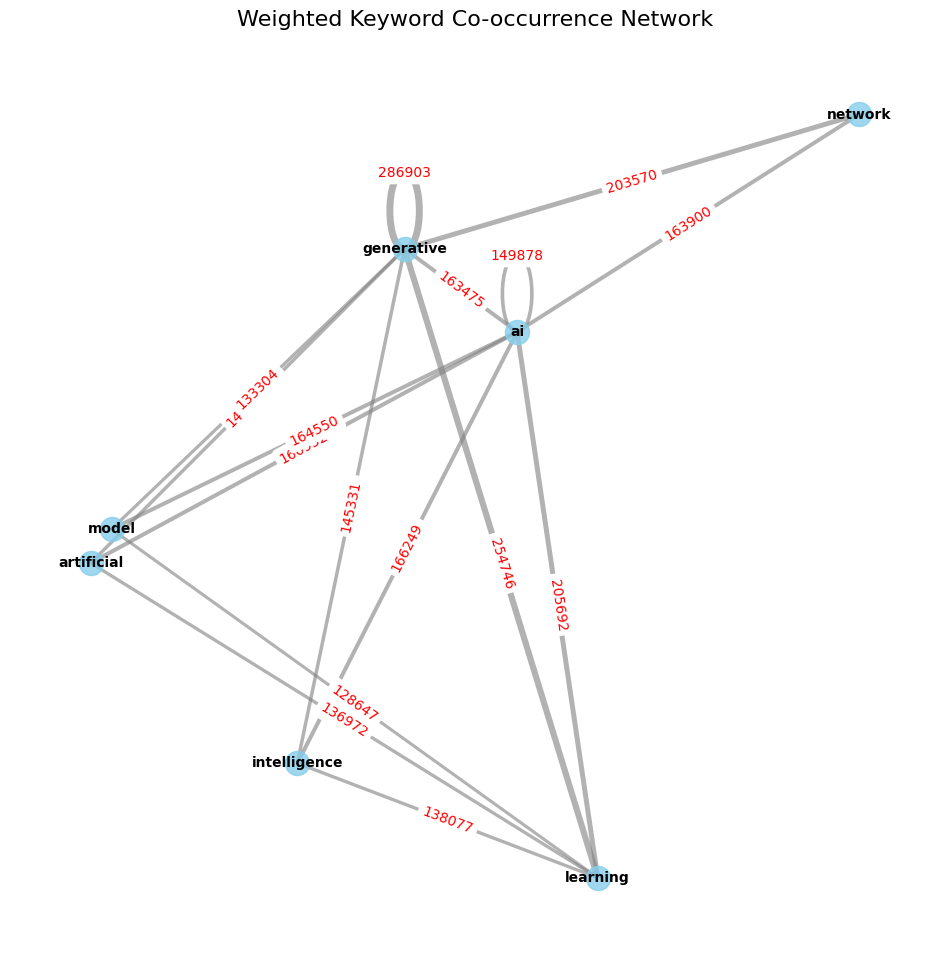

In [21]:
# Customized weighted graph visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42) # Set seed for reproducibility
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_weights_normalized = [weight / max(edge_weights) * 5 for weight in edge_weights]
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_weights_normalized, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

# Displaying edge weights as labels for weights greater than 1
edge_labels = {(word1, word2): f'{weight}' for (word1, word2, weight) in G.edges(data='weight') if weight > 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Weighted Keyword Co-occurrence Network", fontsize=16)
plt.axis('off') # Turn off axis labels
plt.show()


In [22]:
import itertools
import nltk

# Using the tokens that we generated for frequency distribution
filtered_tokens = tokens

# Defining a window size for co-occurrence
window_size = 5

# Creating co-occurrence pairs with weights within the defined window size
co_occurrence_pairs = []
for i in range(len(filtered_tokens)):
    for j in range(i + 1, min(i + window_size + 1, len(filtered_tokens))):
        co_occurrence_pairs.append((filtered_tokens[i], filtered_tokens[j]))

# Creating a frequency distribution of the co-occurrence pairs
weighted_co_occurrences = nltk.FreqDist(co_occurrence_pairs)

# Calculating parameters to judge co-occurrences
total_pairs = len(co_occurrence_pairs)  # Total number of co-occurrence pairs
unique_pairs = len(weighted_co_occurrences)  # Total number of unique co-occurrence pairs
max_weight = max(weighted_co_occurrences.values()) if weighted_co_occurrences else 0  # Maximum weight among co-occurrence pairs
min_weight = min(weighted_co_occurrences.values()) if weighted_co_occurrences else 0  # Minimum weight among co-occurrence pairs
average_weight = sum(weighted_co_occurrences.values()) / total_pairs if total_pairs else 0  # Average weight of co-occurrence pairs

# Printing the calculated parameters
print("Total Pairs:", total_pairs)
print("Unique Pairs:", unique_pairs)
print("Maximum Weight:", max_weight)
print("Minimum Weight:", min_weight)
print("Average Weight:", average_weight)


Total Pairs: 76135
Unique Pairs: 46588
Maximum Weight: 472
Minimum Weight: 1
Average Weight: 1.0


In [13]:
# Bi- Grams

In [14]:
# Lets also look at bi grams and their frequency distribution

# Tokenize the text into words
big_tokens = word_tokenize(lemmatized_text)

# Convert to lower case
big_tokens = [word.lower() for word in big_tokens]

# Remove punctuation and numbers
big_tokens = [word for word in big_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
big_tokens = [word for word in tokens if word not in stop_words]

# Generating bi-grams
bi_grams = list(bigrams(big_tokens))

# Preprocessing bigrams by sorting the words within each bigram alphabetically
sorted_bi_grams = [tuple(sorted(bigram)) for bigram in bi_grams]

# Frequency distribution of preprocessed bi-grams
bi_gram_freq = FreqDist(sorted_bi_grams)

# Converting frequency distribution to a DataFrame
big_df = pd.DataFrame(bi_gram_freq.most_common(), columns=['Word', 'Frequency'])

# Display the DataFrame
big_df.head(40)


,Word,Frequency
0,"(artificial, intelligence)",444
1,"(ai, generative)",269
2,"(adversarial, generative)",217
3,"(adversarial, network)",214
4,"(language, model)",171
5,"(deep, learning)",161
6,"(generative, model)",141
7,"(language, large)",136
8,"(learning, machine)",127
9,"(ai, intelligence)",71


In [15]:
# Additionally, we can also look at n-grams and their frequency distribution

# Tokenizing the text into words
ng_tokens = word_tokenize(lemmatized_text)

# Convert to lower case
ng_tokens = [word.lower() for word in ng_tokens]

# Remove punctuation and numbers
ng_tokens = [word for word in ng_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
ng_tokens = [word for word in ng_tokens if word not in stop_words]

# Generating trigrams
tri_grams = list(ngrams(ng_tokens, 3))

# Preprocessing trigrams by sorting the words within each trigram alphabetically
sorted_tri_grams = [tuple(sorted(trigram)) for trigram in tri_grams]

# Frequency distribution of preprocessed trigrams
tri_gram_freq = FreqDist(sorted_tri_grams)

# Converting frequency distribution to a DataFrame
ng_df = pd.DataFrame(tri_gram_freq.most_common(), columns=['Word', 'Frequency'])

# Displaying the DataFrame
ng_df.head(40)

,Word,Frequency
0,"(adversarial, generative, network)",227
1,"(language, large, model)",141
2,"(artificial, generative, intelligence)",106
3,"(ai, artificial, intelligence)",93
4,"(artificial, chatgpt, intelligence)",65
5,"(language, natural, processing)",46
6,"(ai, chatgpt, generative)",44
7,"(ai, generative, model)",38
8,"(adversarial, gan, network)",30
9,"(generative, language, model)",29
